In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
df_1=pd.read_csv('energydata_complete.csv')
#rename columns
column_names = {'date': 'date', 
                'Appliances': 'Appliances_Energy', 'lights': 'light_energy_use',
                'T1': 'Temperature_in_kitchen', 'RH_1': 'Humidity_in_kitchen', 
                'T2': 'Temperature_in_livingRoom', 'RH_2': 'Humidity_in_livingRoom', 
                'T3': 'Temperature_in_laundryRoom', 'RH_3': 'Humidity_in_laundryRoom',
                'T4': 'Temperature_in_officeRoom', 'RH_4': 'Humidity_in_officeroom',
                'T5': 'Temperature_in_Bathroom', 'RH_5': 'Humidity_in_bathroom', 
                'T6': 'Temperature_outside', 'RH_6': 'Humidity_outside',
                'T7': 'Temperature_in_ironingroom', 'RH_7': 'Humidity_in_ironingroom',
                'T8': 'Temperature_in_teenagerroom', 'RH_8': 'Humidity_in_teenagerroom',
                'T9': 'Temperature_in_parentroom', 'RH_9': 'Humidity_in_parentroom',
                'T_out': 'Temperature_outsidee', 'Press_mm_hg': 'Pressure', 'RH_out': 'Humidity_outsidee',
                'Windspeed': 'Windspeed', 'Visibility': 'Visbility',
                'Tdewpoint': 'Total_Dew_point', 'rv1': 'Random_variable_1', 'rv2': 'Random_Variable_2'}

In [45]:
energy = df_1.drop(['date', 'lights'], axis=1)

In [46]:
energy[:10]

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,50,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,60,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,60,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,60,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,70,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


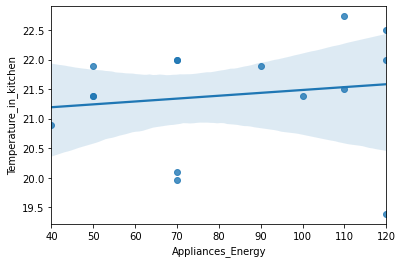

In [47]:
df = energy.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[['Appliances_Energy', 'Temperature_in_kitchen']].sample(15, random_state=42)

#regression plot
sns.regplot(x="Appliances_Energy", y="Temperature_in_kitchen", data=simple_linear_reg_df)

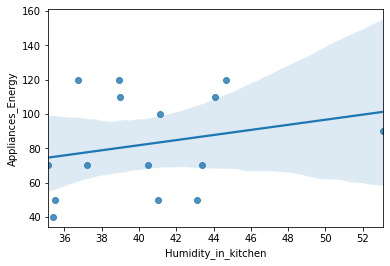

In [48]:
#select a sample of the dataset
simple_linear_reg_df = df[['Humidity_in_kitchen', 'Appliances_Energy']].sample(15, random_state=42)

#regression plot
sns.regplot(x= "Humidity_in_kitchen", y="Appliances_Energy", data=simple_linear_reg_df)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

features_df = normalised_df.drop(columns=['Appliances_Energy'])
energy_target = normalised_df['Appliances_Energy']

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, energy_target, test_size=0.3, random_state=42)
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05